In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from glob import glob
pics = glob('tests/data/*')
pics
pic = 'tests/data/1.png'

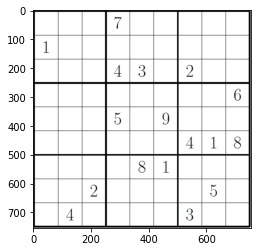

In [3]:
img = cv2.imread(pic)
plt.imshow(img)
plt.show()

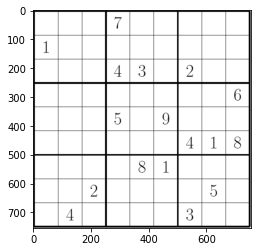

In [4]:
img = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [5]:
coordinates_ver, step_ver = np.linspace(0, img.shape[0], num=9, retstep=True, endpoint=False)
coordinates_hor, step_hor = np.linspace(0, img.shape[1], num=9, retstep=True, endpoint=False)
images_to_recognize = []
for i, ver in enumerate(coordinates_ver.astype(int)):
    for j, hor in enumerate(coordinates_hor.astype(int)):
        images_to_recognize.append((i, j, img[ver: ver+int(step_ver), hor: hor+int(step_hor)]))
        
crop_images_by = int(0.15 * step_ver)

images_to_recognize = [
    (i, j, image[crop_images_by: -crop_images_by, crop_images_by: -crop_images_by])
    for i, j, image in images_to_recognize
]

images_to_recognize = [(i, j, cv2.resize(image, (28, 28))) for i, j, image in images_to_recognize]

In [6]:
import pickle
from model.model import Model

with open('./models/mnist_model.pkl', 'rb') as f:
    model = pickle.load(f)
model

Model(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (activation1): LeakyReLU(negative_slope=0.01)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (dropout2): Dropout2d(p=0.2, inplace=False)
  (activation2): LeakyReLU(negative_slope=0.01)
  (conv3): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (dropout3): Dropout2d(p=0.2, inplace=False)
  (activation3): LeakyReLU(negative_slope=0.01)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc4): Linear(in_features=120, out_features=50, bias=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (activation4): LeakyReLU(negative_slope=0.01)
  (fc5): Linear

In [19]:
from model.helpers import transform_white_on_black, transform_black_on_white
problem = [[0 for _ in range(9)] for _ in range(9)]

for i, j, image in images_to_recognize:
    nb = model.predict_one(transform_black_on_white(image))
    problem[i][j] = int(nb)
problem

[[0, 0, 0, 7, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 4, 3, 0, 2, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 6],
 [0, 0, 0, 5, 0, 9, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 4, 1, 8],
 [0, 0, 0, 0, 8, 1, 0, 0, 0],
 [0, 0, 2, 0, 0, 0, 0, 5, 0],
 [0, 4, 0, 0, 0, 0, 3, 0, 0]]

In [20]:
from sudoku_solver.datatypes import Task
from sudoku_solver.sudoku_solver import solver

solution = solver(Task(problem))
solution

KeyboardInterrupt: 

In [13]:
Task(problem)

ValueError: number must positive integer <= 9